# Introducción a herramientas para Ciencia de Datos - Pandas

In [148]:
import datetime 
import numpy as np
import pandas as pd
from sodapy import Socrata

client = Socrata("www.datos.gov.co", None)

results = client.get("ha6j-pa2r", limit=200000)

# Convert to pandas DataFrame
datos = pd.DataFrame.from_records(results)

datosw = pd.read_json("https://www.datos.gov.co/resource/ha6j-pa2r.json")

datosw.head()


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etar_o,descripci_n_conducta,cantidad
0,ANTIOQUIA,COPACABANA,5212000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
1,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,2
2,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
3,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1
4,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HOMICIDIO,1


In [149]:
datos.shape


(200000, 9)

In [150]:
datos.dtypes

departamento            object
municipio               object
codigo_dane             object
armas_medios            object
fecha_hecho             object
genero                  object
grupo_etar_o            object
descripci_n_conducta    object
cantidad                object
dtype: object

In [151]:
#¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?
datos1 = datos[['departamento','cantidad']]
datos1 = (datos1.groupby(['departamento'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())
datos1
#Podemos ver que los departamentos con mas Homicidios en la historia de estos datos son 
# 1)VALLE           209
# 2)ANTIOQUIA	    157    
# 3)CUNDINAMARCA    105

,departamento,cantidad
0,ANTIOQUIA,1211111111111111111111121111111111111111112111...
1,RISARALDA,1111121111111111111111111111111111111111111111...
2,CALDAS,1111111111111211111111111111111111111111111111...
3,VICHADA,1111111111111111211111111111112111111111111111...
4,GUAVIARE,1111111111111111112111111111111111111111111111...
5,ARAUCA,1111111111111111111111221111111111111111111111...
6,SAN ANDRÉS,1111111111111111111111111121111111111111111111...
7,CHOCÓ,1111111111111111111111111111211111111111111111...
8,AMAZONAS,1111111111111111111111111111112111111111111111...
9,CESAR,1111111111111111111111111111111121111111111111...


      departamento fecha_hecho    cantidad
0           ARAUCA  11/07/2010        8111
1            CESAR  20/06/2010  7111121111
2           TOLIMA  20/04/2010           7
3           NARIÑO  21/10/2011      512111
4           ARAUCA  17/03/2012      441111
...            ...         ...         ...
67424      GUAJIRA  19/03/2018           1
67425      GUAJIRA  19/04/2010           1
67426      GUAJIRA  19/05/2012           1
67427      GUAJIRA  19/05/2015           1
67428      VICHADA   9/11/2014           1

[67429 rows x 3 columns]


<AxesSubplot:>

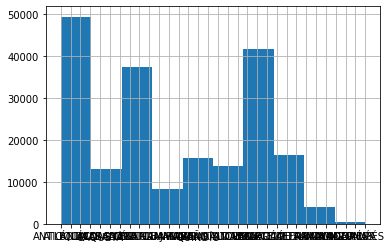

In [153]:
#1. ¿Cuáles han sido los departamentos (TOP 3) más afectados en el último año?
datos1 = datos[['departamento','cantidad','fecha_hecho']]
datos2 = (datos1.groupby(['departamento','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

print (datos2)
datos['departamento'].hist()

#Podemos ver que los departamentos con mas Homicidios en el último año de estos datos son:
# 1)VALLE           56
# 2)CUNDINAMARCA	34    
# 3)ANTIOQUIA       12

In [154]:
#2.¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?
armas_medios_emp_num =  datos.groupby('armas_medios')['armas_medios'].count().sort_values(ascending=False)
print(armas_medios_emp_num)
# El arma mas común para cometer Homicidios son las ARMA DE FUEGO .

armas_medios
ARMA DE FUEGO                         108704
VEHICULO                               34201
ARMA BLANCA / CORTOPUNZANTE            28716
MOTO                                   17000
CONTUNDENTES                            4815
-                                       1614
SIN EMPLEO DE ARMAS                     1087
NO REPORTADO                            1060
BICICLETA                                506
ARTEFACTO EXPLOSIVO/CARGA DINAMITA       496
CUERDA/SOGA/CADENA                       427
MINA ANTIPERSONA                         320
BOLSA PLASTICA                           185
PUNZANTES                                151
GRANADA DE MANO                          134
CORTANTES                                114
COMBUSTIBLE                               79
TREN                                      71
CINTAS/CINTURON                           54
CILINDRO BOMBA                            46
ALMOHADA                                  44
VENENO                                    

In [155]:
#3. ¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?
datos3 = (datos.groupby(['genero','grupo_etar_o'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index()
               )
               

datos3 =datos3.drop(['codigo_dane'],axis=1)
print(datos3)
datos['genero'].hist()


#La proporcion de homicidios es de 10 hombres por 1 mujer. La  mayoria de homicidios cometidos fueron realizados por hombres adultos con 859 homicidios tambien varia en incremento durante los ultimos años.


       genero grupo_etar_o fecha_hecho  cantidad
0   MASCULINO      ADULTOS   1/01/2010        91
1   MASCULINO      ADULTOS  17/01/2010        75
2   MASCULINO      ADULTOS  16/01/2010        59
3   MASCULINO      ADULTOS  10/01/2010        55
4   MASCULINO      ADULTOS   9/01/2010        54
..        ...          ...         ...       ...
69   FEMENINO      MENORES  12/01/2010         1
70   FEMENINO      ADULTOS   6/01/2010         1
71   FEMENINO      ADULTOS  15/01/2010         1
72   FEMENINO  ADOLECENTES  16/01/2010         1
73  MASCULINO      MENORES   8/01/2010         1

[74 rows x 4 columns]


<AxesSubplot:>

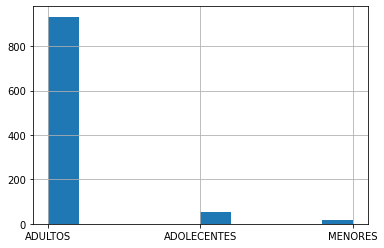

In [ ]:
#3. ¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?
datos4 = (datos.groupby(['genero','grupo_etar_o','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())
               
datos4 =datos4.drop(['codigo_dane'],axis=1)
print(datos4)
datos['grupo_etar_o'].hist()

#La proporcion de homicidios es de 10 hombres por 1 mujer. La  mayoria de homicidios cometidos fueron realizados por hombres adultos con 859 homicidios tambien varia en incremento durante los ultimos años.

[]

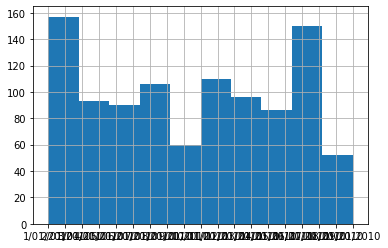

In [ ]:
#4. ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?
datos6 = (datos.groupby(['descripci_n_conducta','fecha_hecho'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

datos6 =datos6.drop(['codigo_dane'],axis=1)
datos6['fecha_hecho'].value_counts().plot()
datos6
#En los primeros dias del año, es decir en festividades de años nuevo se evidencia un alto incremento en los homicidios siendo el dia más frecute el 1 de enero.

<AxesSubplot:>

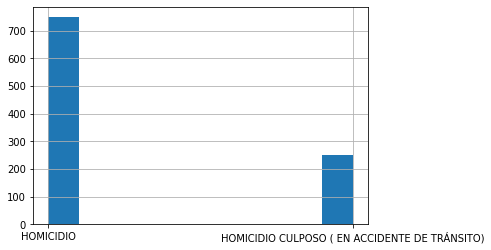

In [ ]:
#4. ¿cuáles son los delitos, descripciones o modalidades más comunes?
datos7 = (datos.groupby(['descripci_n_conducta'])
               .sum(['cantidad'])
               .sort_values(['cantidad'], ascending=False)
               .reset_index())

datos7 =datos7.drop(['codigo_dane'],axis=1)
datos7

datos['descripci_n_conducta'].hist()

#los delitos, descripciones o modalidades más comunes son homicidio y HOMICIDIO CULPOSO por ACCIDENTE DE TRÁNSITO)